In [1]:
import os
# import drjit
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

In here, we generate additional results or data, which will e.g. be inserted into graphs from presentation.ipynb

## Time Domain Simulation

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 6.8782e-02 | 1.0000e+00 |     1267793 |    18432000 |         6000 |        6000 |       494.6 |reached max iter       
     -4.0 | 4.8556e-02 | 1.0000e+00 |      894989 |    18432000 |         6000 |        6000 |       496.4 |reached max iter       
     -3.0 | 3.3200e-02 | 1.0000e+00 |      611937 |    18432000 |         6000 |        6000 |       497.9 |reached max iter       
     -2.0 | 2.1325e-02 | 1.0000e+00 |      393069 |    18432000 |         6000 |        6000 |       497.9 |reached max iter       
     -1.0 | 1.2827e-02 | 1.0000e+00 |      236420 |    18432000 |         6000 |        6000 |       497.5 |reached max iter       
      0.0 | 7.4179e-03 | 1.0000e+00 |      136727 |    18432000 |         6000 |     

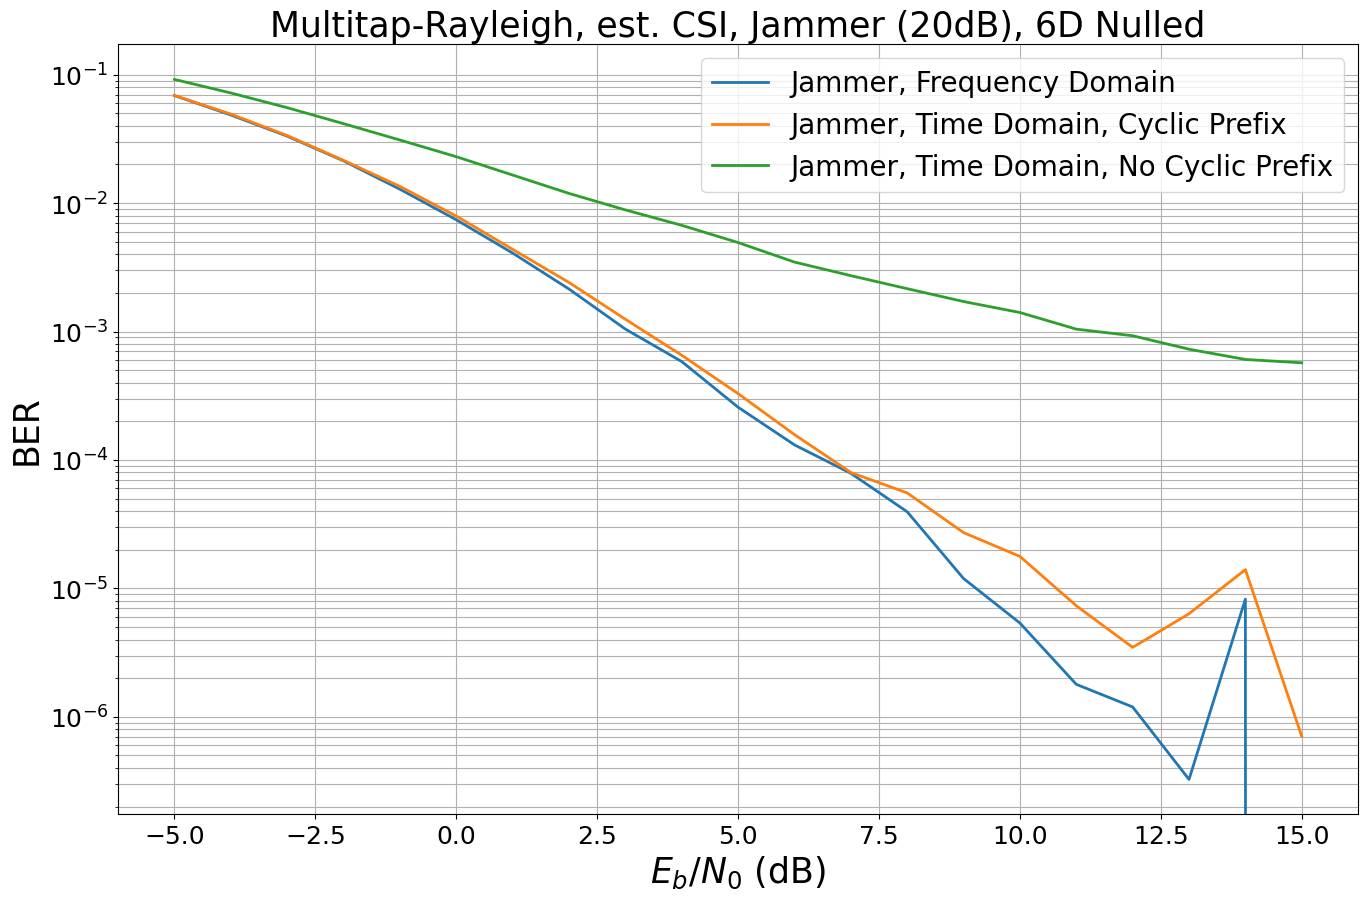

In [3]:
# 1. Multitap-Rayleigh, est. CSI
# 2. UMi, NR-Compliant (2.3us CP), est. CSI
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 6
model_parameters["perfect_csi"] = False
model_parameters["perfect_jammer_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
model_parameters["cyclic_prefix_length"] = 50
# model_parameters["jammer_mitigation_dimensionality"] = 3
sim.BATCH_SIZE = 4
# sim.MAX_MC_ITER = 70
# sim.ebno_dbs = np.linspace(-5., 15., 10)
# sim.MAX_MC_ITER = 1500
# sim.ebno_dbs = np.linspace(-5., 15., 21)
sim.MAX_MC_ITER = 8000
sim.ebno_dbs = np.linspace(5., 12., 8)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Cyclic Prefix")

# jammer_parameters["send_cyclic_prefix"] = False
# model = Model(**model_parameters)
# simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "Multitap-Rayleigh, est. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers2/time_pos_rayleigh.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 7.0104e-03 | 1.0000e+00 |      129216 |    18432000 |         6000 |        6000 |       490.8 |reached max iter       
     -4.0 | 3.7878e-03 | 9.9350e-01 |       69817 |    18432000 |         5961 |        6000 |       490.1 |reached max iter       
     -3.0 | 1.8780e-03 | 9.2283e-01 |       34615 |    18432000 |         5537 |        6000 |       491.8 |reached max iter       
     -2.0 | 9.7390e-04 | 7.3417e-01 |       17951 |    18432000 |         4405 |        6000 |       489.8 |reached max iter       
     -1.0 | 4.3283e-04 | 4.7500e-01 |        7978 |    18432000 |         2850 |        6000 |       487.0 |reached max iter       
      0.0 | 2.2103e-04 | 2.7383e-01 |        4074 |    18432000 |         1643 |     

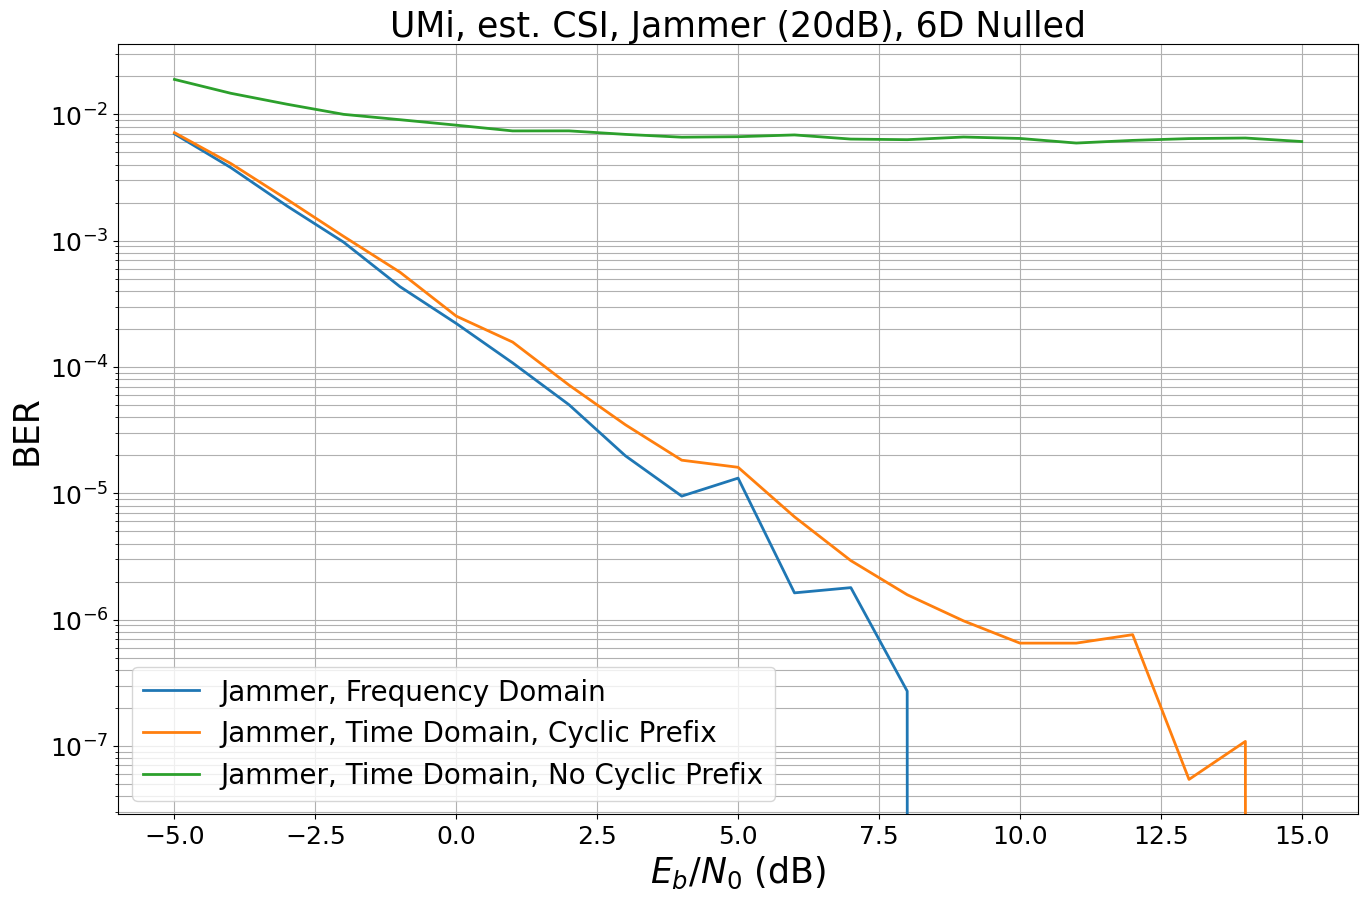

In [4]:
# 1. Multitap-Rayleigh, est. CSI
# 2. UMi, NR-Compliant (2.3us CP), est. CSI
ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["num_ut"] = 6
model_parameters["perfect_csi"] = True
model_parameters["perfect_jammer_csi"] = True
model_parameters["num_silent_pilot_symbols"] = 6
model_parameters["jammer_present"] = True
model_parameters["jammer_power"] = db_to_linear(20.)
model_parameters["jammer_mitigation"] = "ian"
model_parameters["scenario"] = "umi"
model_parameters["cyclic_prefix_length"] = 100
# model_parameters["jammer_mitigation_dimensionality"] = 3
sim.BATCH_SIZE = 4
# sim.MAX_MC_ITER = 70
# sim.ebno_dbs = np.linspace(-5., 15., 10)
# sim.MAX_MC_ITER = 1500
# sim.ebno_dbs = np.linspace(-5., 15., 21)
sim.MAX_MC_ITER = 8000
sim.ebno_dbs = np.linspace(0., 6., 7)

model = Model(**model_parameters)
simulate_model(model, "Jammer, Frequency Domain")

model_parameters["domain"] = "time"
jammer_parameters["send_cyclic_prefix"] = True
model = Model(**model_parameters)
simulate_model(model, "Jammer, Time Domain, Cyclic Prefix")

# jammer_parameters["send_cyclic_prefix"] = False
# model = Model(**model_parameters)
# simulate_model(model, "Jammer, Time Domain, No Cyclic Prefix")

ber_plots.title = "UMi, est. CSI, Jammer (20dB), 6D Nulled"
ber_plots()
with open("bers/time_pos_umi.pickle", 'wb') as f:
    bers = pickle.dump(ber_plots, f)

#### Jammer Singular Values

## Coded Jammer Training

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 6.8752e-02 | 9.8000e-01 |      337928 |     4915200 |         1568 |        1600 |       286.0 |reached max iter       
     -4.0 | 4.3471e-02 | 8.9687e-01 |      213671 |     4915200 |         1435 |        1600 |       287.2 |reached max iter       
     -3.0 | 2.9216e-02 | 7.5000e-01 |      143604 |     4915200 |         1200 |        1600 |       287.1 |reached max iter       
     -2.0 | 2.1870e-02 | 6.5500e-01 |      107494 |     4915200 |         1048 |        1600 |       286.9 |reached max iter       
     -1.0 | 1.7775e-02 | 5.8375e-01 |       87369 |     4915200 |          934 |        1600 |       285.0 |reached max iter       
      0.0 | 1.6330e-02 | 5.4875e-01 |       80265 |     4915200 |          878 |     

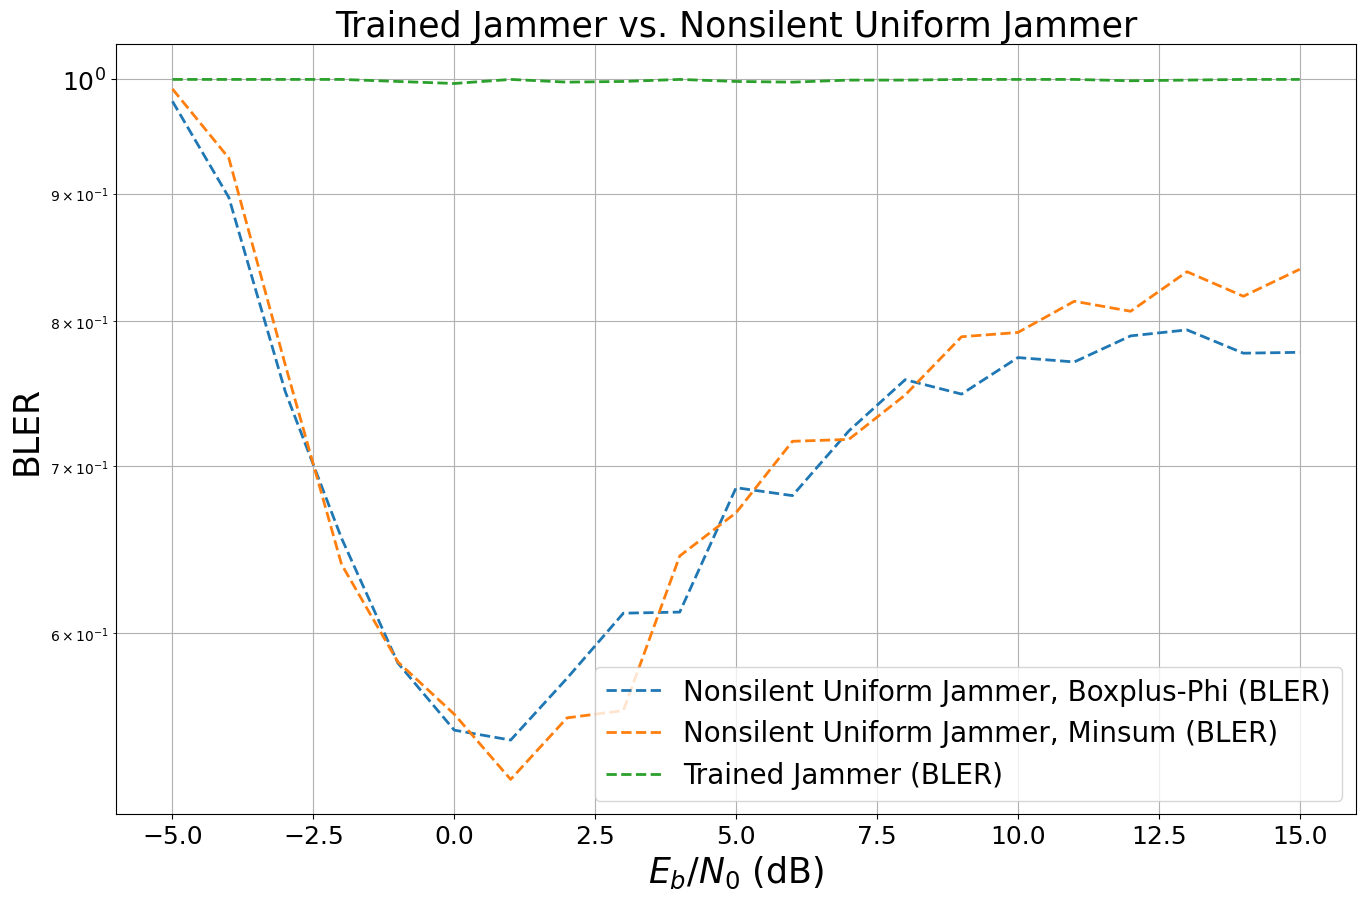

In [5]:
# noch einen Plot mit Minsum
ber_plots.reset()
# common parameters
model_parameters = {}
jammer_parameters = {}
decoder_parameters={}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 4
model_parameters["jammer_present"] = True
model_parameters["jammer_mitigation"] = "pos"
model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
model_parameters["coderate"] = 0.5
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 1], dtype=tf.bool)
decoder_parameters["num_iter"] = 8
decoder_parameters["cn_type"] = "boxplus-phi"
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["decoder_parameters"] = decoder_parameters
# sim.BATCH_SIZE = 128
# sim.MAX_MC_ITER = 50
sim.ebno_dbs = np.linspace(-5., 15., 10)
sim.MAX_MC_ITER = 400
# sim.ebno_dbs = np.linspace(-5., 15., 21)

jammer_power = 1.0
model_parameters["jammer_power"] = jammer_power * normalize_power(tf.concat([tf.zeros([4,1]), tf.ones([10,1])], axis=0))

# Nonsilent Uniform jammer
model = Model(**model_parameters)
model._decoder.llr_max = 1000
simulate_model(model, "Nonsilent Uniform Jammer, Boxplus-Phi", add_bler=True)

# Nonsilent Uniform jammer with Minsum
decoder_parameters["cn_type"] = "minsum"
model = Model(**model_parameters)
model._decoder.llr_max = 1000
simulate_model(model, "Nonsilent Uniform Jammer, Minsum", add_bler=True)

# Trained jammer
model_parameters["jammer_power"] = jammer_power
model = Model(**model_parameters)
model._decoder.llr_max = 1000
load_weights(model, "weights/coded/symbol/iteration_loss_2/ue_4_alpha_0.5_exp_False_8_iter.pickle")
simulate_model(model, "Trained Jammer", add_bler=True)

ber_plots.title = "Trained Jammer vs. Nonsilent Uniform Jammer"
ber_plots(show_ber=False)
# with open("bers/coded_bler.pickle", 'wb') as f:
#     bers = pickle.dump(ber_plots, f)

## 

In [ ]:
# noch einen Plot mit Minsum
ber_plots.reset()
# common parameters
model_parameters = {}
jammer_parameters = {}
decoder_parameters={}
model_parameters["perfect_csi"] = False
model_parameters["num_ut"] = 4
model_parameters["jammer_present"] = True
model_parameters["jammer_mitigation"] = "pos"
model_parameters["jammer_mitigation_dimensionality"] = 1
model_parameters["num_silent_pilot_symbols"] = 4
model_parameters["coderate"] = 0.5
jammer_parameters["trainable"] = False
jammer_parameters["trainable_mask"] = tf.ones([14, 1], dtype=tf.bool)
decoder_parameters["num_iter"] = 8
decoder_parameters["cn_type"] = "boxplus-phi"
model_parameters["jammer_parameters"] = jammer_parameters
model_parameters["decoder_parameters"] = decoder_parameters
# sim.BATCH_SIZE = 128
# sim.MAX_MC_ITER = 50
sim.ebno_dbs = np.linspace(-5., 15., 10)
sim.MAX_MC_ITER = 400
sim.ebno_dbs = np.linspace(-5., 15., 21)

jammer_power = 1.0
model_parameters["jammer_power"] = jammer_power * normalize_power(tf.concat([tf.zeros([4,1]), tf.ones([10,1])], axis=0))

# Nonsilent Uniform jammer
model = Model(**model_parameters)
simulate_model(model, "Nonsilent Uniform Jammer, Boxplus-Phi", add_bler=True)

# Nonsilent Uniform jammer with Minsum
decoder_parameters["cn_type"] = "minsum"
model = Model(**model_parameters)
simulate_model(model, "Nonsilent Uniform Jammer, Minsum", add_bler=True)

# Trained jammer
model_parameters["jammer_power"] = jammer_power
model = Model(**model_parameters)
load_weights(model, "weights/coded/symbol/iteration_loss_2/ue_4_alpha_0.5_exp_False_8_iter.pickle")
simulate_model(model, "Trained Jammer", add_bler=True)

ber_plots.title = "Trained Jammer vs. Nonsilent Uniform Jammer"
ber_plots(show_ber=False)
# with open("bers/coded_bler.pickle", 'wb') as f:
#     bers = pickle.dump(ber_plots, f)